# Intro to ML
## Selección de modelo y ajuste de hiper-parametros
---

En la sesión anterior vimos cómo usar la librería *de facto* para machine learning en python: `sklearn`.

En la sesión de hoy hablaremos de como las funcionalidades avanzadas de `sklearn` nos facilitan tanto la elección de modelos cómo su validación.

**ToC:**

1. Selección de Modelos: Encontrando el compromiso entre Bies y Varianza
1. Ajuste de hiper-parámetros


## 1. Selección de Modelos
---

Los algoritmos de ML son herramientas muy potentes que nos permiten tanto ganar información no accesible a primera vista y, además, realizar modelos sobre los datos de forma que podamos hacer predicciones sobre nuevas observaciones.

A la hora de encarar un modelado predictivo, tenemos a nuestro haber un abanico muy amplio de modelos sobre los que elegir. La pregunta es: ¿cómo elijo un modelo?

### 1.1 Bies y varianza

Cómo bien sabéis a estas alturas, si nos dan una serie de atributos (*features*) $X = x_1, ..., x_n$ y un objetivo asociado (*target*) $y = y_1, ...y_n$, existe una función **real** $f(x)$ que nos permite modelar los datos de forma que $y = f(x) + \epsilon$, dónde $\epsilon$ es ruido con $\mu = 0$ y $var = \sigma^2$

Lo que queremos conseguir es un modelo, al que llamaremos $\hat{f}(x)$ que **aproxime** la función real lo mejor posible. Sucede que independientemente del modelo de ML que seleccionemos para aproximarnos a la función **real** podemos descomponer el **error** que comete nuestro modelo $\hat{y}$ sobre nuevas observaciones $x_{test}$ en tres componentes distintas:

$ Err(x) = \mathbb{E} \left[ \left( y_{test} - \hat{y} \right)^2 \right] = \left(E[\hat{f}(x)]-f(x)\right)^2 + E\left[\left(\hat{f}(x)-E[\hat{f}(x)]\right)^2\right] +\sigma_e^2$

* **Bias (sesgo)**

$E[\hat{f}(x)]-f(x)$

La diferencia entre el valor predicho por el modelo y el valor real.

Respecto al modelado, puede interpretarse como los supuestos de simplificación que hace un modelo para facilitar el aprendizaje de la función objetivo. El caso típico es el de la regresión lineal: un modelo paramétrico dónde se resuelve un problema de optimización para encontrar el parametro que minimiza el error al hacer predicciones.

* **Bajo bies**: Pocos supuestos sobre la forma de los datos, *más flexibles*: Decission trees, knn, ...
* **Alto bies**: Simplificaciones sobre la forma de los datos, *menos flexibles*: Linear models


* **Varianza**

$E\left[\left(\hat{f}(x)-E[\hat{f}(x)]\right)^2\right]$

El error producido debido a la sensibilidad del modelo con respecto a los datos de entreno. Imagina que de un set de datos extraemos de forma aleatoria dos subgrupos de entreno. Idealmente, las predicciones del modelo no deberían cambiar mucho de un set de entreno a otro. Esto significaría que el modelo que hemos entrenado está haciendo un buen trabajo haciendo el mapeo de las variables de entrada a y salida.

Podemos dividir los distintos algoritmos de ML segun como le afectan los cambios en los datos de entreno:

* **Baja Varianza**: Pequeños cambios en las predicciones: Linear models
* **Alta Varianza**: Grandes cambios en las prediccinoes: Decission trees, knn, ...

### 1.2 Compromiso entre bies y varianza

Como hemos visto, los modelos paramétricos, tipo los lineales, son modelos con un alto bies y una baja varianza. Por otro lado, los algoritmos no paramétricos, tipo los arboles de decision, son modelos con bajo bies y alta varianza.

![fit_errors](img/underfitting_overfitting.png)

Existe un problema de modelado referente a cada uno de los casos. En el primero, corremos el riesgo de so-entreno (underfitting), es decir, que nuestro modelo no sea lo suficientemente flexible como para poder representar la función real que intentamos aproximar. En el segundo caso, nos encontramos en el polo opuesto: nuestro modelo es tan flexible que en vez de aproximarse a la función real se "aprende" el set de datos de entreno de memoria, por lo que impide la generalización del modelo fuera del set de entreno.

![bies](img/bias-variance.png)

Vemos en el gráfico de arriba que un buen modelo es aquel que nos minimiza el error de las predicciones y que este óptimo implica un compromiso entre lo simple o complejo que es mi modelo y los datos que quiero representar.


#### Consideraciones prácticas

Entonces, ¿cómo prevenimos que nuestro modelo se quede corto o bien no generalice de forma óptima a nuevas observaciones?

La única forma de comprobar que nuestro modelo generaliza bien es guardando una parte de los datos para medir el error *out-of-sample*, es decir, el error sobre los datos que no ha visto el modelo durante la fase de entreno.

Con tal de poder elegir el mejor modelo y sus parametros se dividirá inicialmente el dataset en dos subsets:

* subset de entrenamiento: normalmente se utiliza el 80% del tamaño de la muestra
* subset de testeo: el 20% restante.

Así mismo, es común y buena práctica utilizar la técnica de **validación cruzada**. Esta técnica se basa en entrenar un modelo con unos hiper-parametros *k*-veces sobre un resampleo aleatorio del subset de entrenamiento en *k-1* y evaluarlo en la restante.

### Preparación del entorno
---
**Ejercicio 0: Cómo siempre, empezaremos por cargar las librerías necesarias para poder trabajar con datos en python**

In [2]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## figure aesthetics
sns.set_context('talk')
sns.set_style('darkgrid')

**Ejercicio 1: Carga el dataset de ejemplo por defecto de las casas de boston**

scikit-learn viene con una serie de datasets de ejemplo. Carga en una variable `data` el dataset e investiga los atributos de data.


data.DESCR --> descripcion del dataset

data.feature_names --> lista con el nombre de las columnas

data.data -->  array con los datos del dataset (la X)

data.target --> array con la variable objetivo (la y)

In [3]:
## Importa load_boston de sklearn.datasets
from sklearn.datasets import load_boston

## Asignalo a `data`
data = load_boston()

In [6]:
## Crea un dataframe a partir de data.data y data.feature_names
df = pd.DataFrame(data=data.data, columns=data.feature_names)

## Crea la columna `y` a partir de data.target
data['y'] = data.target

**Ejercicio 2: Haz un descriptivo rápido y revisa las primeras filas**

In [10]:
## Realiza un descriptivo
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
## Muestra las primeras filas
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Ejercicio 3: Haz un plot de la correlación entre variables**

Consulta cómo hacerlo aquí --> https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<AxesSubplot:>

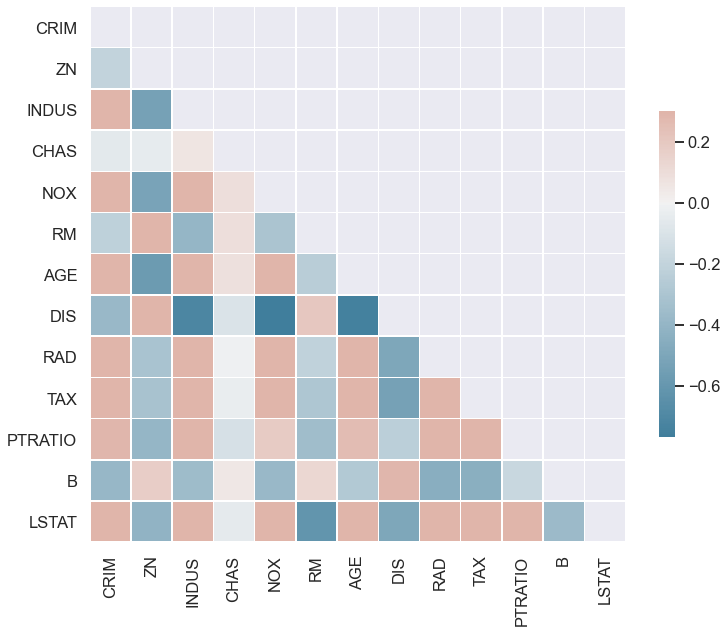

In [17]:
# Computa la matriz de correlación
corr = df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Crea una figura de tamaño 12, 12
f, ax = plt.subplots(figsize=(12, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))


## Plotea el mapa de calor con los valores de la correlacion
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**Ejercicio 4: Haz un pairplot para ver somo se relacionan entre ellas con una correlacion > 0.7**

In [ ]:
## Filtra sobre `corr` aquellos valores que tengan un valor absoluto > 0.7 y < 1
highly_corr = corr[(## > 0.7) & (## < 1)]

## Haz un `melt` sobre highly corr y elimina los valores nulos

highly_corr_melt = ##

## Quedate con los valores unicos de la columna variable

list_highly_corr_variables = ##

print(list_highly_corr_variables)

In [ ]:
## Create the pairplot using seaborn

sns.pairplot(data=df[##])

**Qué conclusiones podemos sacar por ahora ?**

**Es un problema de clasificación o regresión?**

**Es un problema lineal?**

---
## Overfitting y underfitting

Para ilustrar de forma práctica el concepto de overfitting y el compromiso entre el bies y la varianza, vamos a simplificar el modelado usando solo la variable `LSTAT` y dos modelos distintos que representen a los dos extremos de los puntos anteriores:

* Bajo bies y alta varianza: **Decission tree**

* Alto bies y baja varianza: **Linear model**

Antes de empezar, vamos a ver de forma clara como luce nuestro problema de una sola variable.

>Nota
>
> Los arboles de decisión son modelos muy flexibles que no hacen ninguna hipótesis inicial sobre la posible relación entre la variable independiente y los predictores. La forma de "aprender" es ir creando splits binarios de forma iterativa sobre las variables. No entraremos en detalle (aún) de cómo funcionan. Bastará con saber para el ejercicio de hoy que uno de los hiperparametros que podemos controlar es la profundidad del arbol, que nos permitirá parar el número de capas de splits que realizamos.



![dec_tree](./img/dec_tree.png)


**Ejercicio 5: Haz un grafico con la relación de la variable objetivo `y` con el único predictor, `LSTAT`**

In [ ]:
df[['LSTAT', 'y']].plot(kind=##, x=##, y=##)

**Ejercicio 6: Divide el dataset en dos sub datasets, el de entreno y el de testeo con el 20% del tamaño total del dataset.**

**Haz un grafico como el anterior con los diferentes datasets con colores distintos.**

**Comprueba que los datasets de entrenamiento y testeo tienen una distribucion similar**


In [ ]:
from sklearn.model_selection import train_test_split

test_size = ##

X_train, X_test, y_train, y_test = train_test_split(##, ##, test_size=##, random_state=42)

plt.scatter(##, ##, label='train', c='firebrick', alpha=0.5)
plt.scatter(##, ##, label='test', alpha=0.5)
plt.legend()

In [ ]:
## Comprueba las distribuciones de X e y para train y test

**Ejercicio 7: Importa de la libreria sklearn los modelos elegidos anteriormente y entrenalos**

DecissionTree vs. LinearRegression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

reg_DT = DecisionTreeRegressor(random_state=42)
reg_LR = ##

reg_DT.fit(##, ##)
reg_LR.fit(##, ##)

**Ejercicio 8: Evalúa el error producido dentro de la muestra de entreno para los dos algoritmos. Utiliza el RMSE**

In [ ]:
from sklearn.metrics import mean_squared_error

def RMSE(y_true, y_pred):
    mse = ##
    return np.sqrt(mse)

in_sample_error_DT = RMSE(##, ##)
in_sample_error_LR = RMSE(##, ##)

print('In sample error for DT: {e} miles de $'.format(e=round(in_sample_error_DT, 2)))
print('In sample error for LR: {e} miles de $'.format(e= round(in_sample_error_LR, 2)))

**Ejercicio 9: Evalúa el error producido fuera de la muestra de entreno (datos de test) para los dos algoritmos. Utiliza el RMSE**

In [ ]:
out_sample_error_DT = RMSE(##, ##)
out_sample_error_LR = RMSE(##, ##)

print('Out of sample error for DT: {e} miles de $'.format(e=round(out_sample_error_DT, 2)))
print('Out of sample error for LR: {e} miles de $'.format(e= round(out_sample_error_LR, 2)))

### Preguntas

Qué esta pasando?

Parece que un modelo simple de regresión lineal generaliza mejor que un modelo con un bies bajo?

Cómo puede ser esto?


**Ejercicio 10: Haz una predicción para todos los valores que pueden tomar la variable de predicción** 

In [ ]:
# calcula el valor minimo del campo LSTAT
x_min = ##

# calcula el valor máximo del campo LSTAT
x_max = ##

# Crea un array de 200 elementos que vayan de manera uniforme entre los límites de LSTAT. (Tip: np.linspace)
x = ##

# Haz un reshape de los valores usando .reshape(-1, 1). Nos evitará problemas con el resto de la librería.
x = x.reshape(-1, 1)

# Haz una predicción para los valores del array creado en el paso anterior para cada uno de los modelos
y_DT = reg_DT.predict(x)
y_LR = reg_LR.predict(x)

**Ejercicio 11: Haz un gráfico x-y con los valores de entreno y test con las predicciones de cada uno de los modelos**

In [ ]:
# crea un subplot de dos columnas con un tamaño de 12 x 6
fig, ax = plt.subplots(nrows=##, ncols=##, sharey=True, figsize=(12, 6))

# Asigna al primer subplot los datos de entreno contra las predicciones de los dos modelos
ax[0].scatter(##, ##, label='train', c='firebrick', alpha=0.5)
ax[0].plot(##, ##, '*-', label='DT')
ax[0].plot(##, ##, c='orange', label = 'LR')
ax[0].legend()

# Asigna al segundo subplot los datos de testeo contra las predicciones de los dos modelos
ax[1].scatter(##, ##, label='test', c='green', alpha=0.5)
ax[1].plot(##, ##, 'X-', label='DT')
ax[1].plot(##, ##,  c='orange', label = 'LR')
ax[1].legend()

En efecto, lo que estamos observando aquí en directo es nada más ni nada menos que los efectos de so y sobre entreno. El arbol de decisión, al irse creando a medida que se entrena sobre los datos, se adapta demasiado bien a los datos de entreno y generaliza mal.

Uno de los hiper-parametros de los arboles de decisión que nos permite "jugar" con la flexibilidad del modelo es la profundidad del arbol (max_depth). Por ahora, no entraremos en detalle en el concepto de "profundidad", pero si que lo usaremos de forma programática.

**Ejercicio 12: Compara gráficamente como evoluciona el RMSE en función de la profundidad del arbol**

In [ ]:
max_depths = range(1, 20)
in_sample_errors = []
out_sample_errors = []
for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    y_pred_train = ##
    y_pred_test = ##
    in_sample_error = ##
    out_sample_error = ##
    in_sample_errors.append(##)
    out_sample_errors.append(##)

## Plot the in sample and out of sample errors vs the depth of the tree
plt.plot(##, ##, c='firebrick', label='In-Sample Error')
plt.plot(##, ##, label='Out-Sample Error')

plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.legend(loc='best')

## Validación cruzada (cross-validation)
---
Ya hemos visto que el mejor modelo no es aquel que minimiza el error dentro de la muestra de entreno, si no que es aquel que minimiza el error de la muestra de testeo.

A pesar de que la división entre datos de entreno y datos de testeo da buenos resultados, es una aproximación básica que no nos permite afinar los hiperparametros de forma correcta. A base de afinar los hiperparametros evaluando el modelo en el set de testeo, podemos acabar incurriendon en una especie de "filtración" de la información de los datos de testeo al modelo. Con tal de evitar esto, en vez de dividir sólo en datos de entreno y testeo, deberíamos dividirlos en 3 partes: entreno, validación y test. De esta forma, podemos entrenar y refinar sobre los datos de entreno y validación para que una vez tengamos el modelo "afinado" podamos testearlo en el set de test.

![train_test](./img/trainvalidationtest.jpg)

Esta aproximación, a pesar de ser correcta, implica ciertas limitaciones:

1. Reduce drásticamente el volumen de datos con el que estamos trabajando
1. No permite hacer "estadística" sobre los valores que obtenemos

Una forma de hacer frente a estas limitaciónes es mediante la técnica conocida cómo **validación cruzada**. Consiste en dividir el set de datos en $k$ partes iguales. Una vez hecho esto, podemos entrenar el modelo en $k-1$ y testear en aquella que hemos reservado. A esto se le llama *k-fold cross validation*. Entre sus variantes encontramos:

- **Stratified K-Fold Validation**: cada sub muestra mantiene la proporción de y's (clasificación)
- **Leave-One-Out**: Si $k=n$, dónde $n$ es el número de muestras que tenemos. Intensivo a nivel computacional

![kfold](./img/kfold.png)

La medidad de rendimiento obtenida mediante validación cruzada es la media de los valores calculados. A pesar de que esta aproximación puede ser computacionalmente cara nos permite aprovechar al máximo el número de muestras sobre las que entrenamos el modelo.

Echale un vistazo a la [documentación](http://scikit-learn.org/stable/modules/cross_validation.html)!


Con tal de ilustrar esta metodología, vamos a utilizar la función implementada en sklearn.

Al ser un problema de regresión, optimizaremos los hiperparametros sobre el subset de testeo usando una metrica de rendimiento.

También, en sklearn nos permite definir nuestra propia métrica de rendimiento a partir de una funcion. En este caso, usaremos la inversa del RMSE.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

rmse_scorer = make_scorer(RMSE, greater_is_better=False)

DT_scores = cross_val_score(estimator=##, X=##, y=d##, cv=10, scoring=rmse_scorer)

print('RMSE for DT: {m} +- {s}'.format(m=-round(DT_scores.mean(), 2),
                                       s=round(DT_scores.std(),2)))

**Ejercicio 13: Calcula el RMSE medio para la regresión lineal usando un k=5**

In [ ]:
LR_scores = cross_val_score(##)

print('RMSE for LR: {m} +- {s}'.format(m=-round(LR_scores.mean(), 2),
                                       s=round(LR_scores.std(),2)))

**Ejercicio 14: Grafica cómo evoluciona el RMSE medio para k=10, en comparación con los calculados en el ejercicio 12**

In [ ]:
# inicializa una lista vacia
cv_test_errors_mean = []
cv_test_errors_list = []

#itera sobre la lista de max_depths del ejercicio 12
for max_depth in max_depths:
    # Instancia el arbol
    tree = ##
    
    # calcula el error usando cross_val_score y todo el set de datos.
    # Recuerda en negar el resultado
    cv_test_error = -cross_val_score(##)
    #calcula el valor medio y haz un append a la lista
    mean_cv_error = ##
    cv_test_errors_mean.append(mean_cv_error)
    
    # haz un append a la lista con todo el array de errores
    cv_test_errors_list.append(cv_test_error)

plt.plot(max_depths, in_sample_errors, c='firebrick', label='In-Sample Error')
plt.plot(max_depths, out_sample_errors, label='Out-Sample Error')
plt.plot(max_depths, cv_test_errors_mean, label='Cross-Validation Error')
plt.legend(loc='best')
        
## Graficamos las curvas de aprendizaje de cada subset en el cross_val_score
errors = pd.DataFrame(cv_test_errors_list)
for e in errors:
    plt.plot(max_depths, errors[e], c='gray', alpha=0.2)
plt.xlabel('max_depth')
plt.ylabel('RMSE')


# 2. Grid Search: ajuste de hiper-parametros.
---
Como hemos visto en el apartado anterior, podemos ajustar los hiper-parametros de ciertos modelos para aumentar o disminuir su "flexibilidad" a la hora de adaptarse a los datos y seleccionar el mejor a partir del resultado de la validación cruzada. Si repitieramos el ejercicio anterior para cada uno de los hiper-parametros del modelo podriamos afinar el modelo para poder exprimirlo completamente.

Podemos automátizar este proceso por fuerza bruta definiendo un espacio de busqueda sobre los distintos hiper-parametros que queremos probar y calculando el error cométido para cada una de las combinaciones.

Sklearn nos da una herramienta muy útil para tal propósito, GridSearchCV. Esta herramienta evaluará el modelo con cada una de las combinaciones de hiper-parametros utilizando la técnica del cross validation.

Veamos como usarla.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': range(1, 10)}

reg = DecisionTreeRegressor()

gs_reg_DT = GridSearchCV(estimator=reg,
                         param_grid=params,
                         cv=5,
                         scoring=rmse_scorer)

gs_reg_DT.fit(##, ##)
print(gs_reg_DT.best_params_)

**Ejercicio 15: Guarda en un dataframe los resultados de las iteraciones. Los encontraras en .cv_results_**

In [ ]:
df_cv_results = pd.DataFrame(##)

df_cv_results.head()

**Ejercicio 16: Compara graficamente el mejor modelo DT con la regresion lineal y el arbol de decision iniciales**

## Consideración final del ejercicio

En este ejercicio se han tratado los temas de:

* Compromiso entre bies-varianza

* Como seleccionar un modelo que minimice el error sobre un subset de testeo y/o utilizando validación cruzada

* Como realizar una busquedad de hiperparametros utilizando la función de busqueda paramétrica usando validación cruzada

> No hay entregable sobre esta práctica. Los contenidos de ésta estarán implicitos en el entregable final.